In [4]:
import os
import cv2
import numpy as np
from skimage.feature import graycomatrix, graycoprops

# Step 1: Load Images
def load_images_from_folder(folder_path, label, target_size=(128, 128), limit=400):
    images, labels = [], []
    filenames = sorted(os.listdir(folder_path))
    for i, filename in enumerate(filenames):
        if i >= limit:
            break
        if filename.lower().endswith((".jpg", ".jpeg", ".png")):
            img_path = os.path.join(folder_path, filename)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is not None:
                img = cv2.resize(img, target_size)  # Resize images to target size
                images.append(img)
                labels.append(label)
    return np.array(images), np.array(labels)

# Step 2: Feature Extraction
## 2.1 Extract GLCM Features
def extract_glcm_features(image):
    assert len(image.shape) == 2, "Input must be a grayscale image"
    glcm = graycomatrix(
        image,
        distances=[1],
        angles=[0, np.pi/4, np.pi/2, 3*np.pi/4],
        levels=256,
        symmetric=True,
        normed=True,
    )
    features = []
    properties = ['contrast', 'dissimilarity', 'homogeneity', 'energy', 'correlation', 'ASM']
    for prop in properties:
        features.append(graycoprops(glcm, prop).mean())
    return np.array(features)

## 2.2 Extract SIFT Features (as a replacement for SURF)
def extract_sift_features(image):
    sift = cv2.SIFT_create()
    keypoints, descriptors = sift.detectAndCompute(image, None)
    if descriptors is None:
        return np.zeros(128)  # SIFT descriptors have a fixed size of 128
    return descriptors.mean(axis=0)

# Step 3: Load Data
folder_benign = "C:\\Users\\gvtit\\OneDrive\\Documents\\breast cancer\\archive (1)\\CLAHE_images\\benign"
folder_malignant = "C:\\Users\\gvtit\\OneDrive\\Documents\\breast cancer\\archive (1)\\CLAHE_images\\malignant"
folder_normal = "C:\\Users\\gvtit\\OneDrive\\Documents\\breast cancer\\archive (1)\\CLAHE_images\\normal"


images_benign, labels_benign = load_images_from_folder(folder_benign, label=0)
images_malignant, labels_malignant = load_images_from_folder(folder_malignant, label=1)
images_normal, labels_normal = load_images_from_folder(folder_normal, label=2)

# Combine all images and labels
images = np.concatenate([images_benign, images_malignant, images_normal], axis=0)
labels = np.concatenate([labels_benign, labels_malignant, labels_normal], axis=0)

# Step 4: Extract and Combine Features
glcm_features = []
sift_features = []

for img in images:
    glcm_features.append(extract_glcm_features(img))
    sift_features.append(extract_sift_features(img))

glcm_features = np.array(glcm_features)
sift_features = np.array(sift_features)

# Combine GLCM and SIFT features
combined_features = np.hstack((glcm_features, sift_features))

# Step 5: Save Combined Features
np.save("glcm_features.npy", glcm_features)
np.save("sift_features.npy", sift_features)
np.save("combined_features.npy", combined_features)
np.save("labels.npy", labels)

print("Feature extraction and saving completed.")
print(f"GLCM Features Shape: {glcm_features.shape}")
print(f"SIFT Features Shape: {sift_features.shape}")
print(f"Combined Features Shape: {combined_features.shape}")
print(f"Labels Shape: {labels.shape}")

Feature extraction and saving completed.
GLCM Features Shape: (1200, 6)
SIFT Features Shape: (1200, 128)
Combined Features Shape: (1200, 134)
Labels Shape: (1200,)


In [5]:
import pandas as pd
# Create a DataFrame
data = pd.DataFrame(combined_features)
data['label'] = labels
data

,0,1,2,3,4,5,6,7,8,9,...,125,126,127,128,129,130,131,132,133,label
0,88.727396,3.493609,0.694086,0.640285,0.981917,0.409968,34.348839,14.209302,9.325582,5.604651,...,24.906977,35.162792,23.116280,15.023255,15.279070,25.162790,14.906977,11.000000,22.976744,0
1,383.540883,8.845769,0.571544,0.244126,0.932062,0.059611,24.790909,16.681818,17.900000,19.509090,...,33.927273,23.709091,21.236364,24.600000,29.863636,28.527273,19.181818,14.990909,20.218182,0
2,82.935068,3.889551,0.625617,0.558810,0.983465,0.312272,35.279999,24.320000,16.520000,16.780001,...,22.020000,24.559999,24.559999,20.240000,28.959999,24.780001,10.060000,12.200000,12.760000,0
3,212.142576,5.696405,0.664194,0.334970,0.957303,0.112212,28.946667,24.200001,13.946667,16.120001,...,23.440001,24.133333,33.200001,33.520000,27.320000,14.666667,10.773334,11.066667,14.413333,0
4,224.894785,5.218900,0.627854,0.558387,0.979560,0.311806,43.583332,20.133333,17.950001,14.916667,...,25.366667,19.666666,19.049999,21.250000,20.799999,19.700001,23.716667,14.166667,12.066667,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,514.327034,11.200503,0.341502,0.229729,0.958657,0.052790,36.538460,20.307692,18.317308,19.432692,...,29.923077,24.778847,21.769230,23.817308,31.769230,22.375000,10.653846,9.567307,15.326923,2
1196,621.025667,16.229743,0.234749,0.160447,0.941552,0.025748,30.459145,26.630350,23.249027,21.171206,...,27.863813,22.887159,24.431906,26.610895,26.770428,29.972763,20.097277,15.603113,19.961090,2
1197,663.837736,13.693465,0.373906,0.301322,0.945383,0.090803,38.228573,26.549999,15.828571,15.535714,...,24.600000,27.114286,27.007143,19.971428,28.042856,30.985714,17.735714,10.985714,13.621428,2
1198,474.466765,13.922106,0.257111,0.190740,0.952876,0.036389,34.972351,28.299540,23.271889,21.414747,...,28.894009,27.511520,23.474655,20.700460,26.695852,31.792627,20.115208,13.161290,17.474655,2


In [6]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Step 1: Standardize and Apply PCA as done previously
# Separate features and labels
X = data.iloc[:, :-1].values  # Features (combined GLCM + SURF)
y = data.iloc[:, -1].values   # Labels
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=0.95)  # Retain 95% of the variance
X_pca = pca.fit_transform(X_scaled)

# Step 2: Create a DataFrame for the PCA-transformed features
# Convert the PCA features into a DataFrame
pca_df = pd.DataFrame(X_pca)

# Add the labels to the DataFrame
pca_df['label'] = y

# Step 3: Display the resulting DataFrame
print(pca_df.head())

          0         1         2         3         4         5         6  \
0 -4.990245 -3.828759  1.199593 -0.840011  0.875940 -0.372963  0.119417   
1  5.292025 -1.745053  2.850613 -0.143943 -1.154204 -0.367642 -1.705616   
2 -0.085803  0.217999 -2.192606 -0.346629  2.097650 -2.160052 -1.269249   
3  3.354900 -7.511051 -1.917995 -6.256062  0.598939  0.198792 -0.763621   
4 -3.146274 -0.745359  1.716251  5.999290 -1.623641 -1.497590 -3.216006   

          7         8         9  ...        44        45        46        47  \
0  1.824307 -4.723656  3.752053  ... -0.246810  0.830946  0.548624 -0.184201   
1  2.262068  0.263705  0.841329  ... -0.260051 -0.936165  1.067643 -0.362811   
2 -0.450543  0.287476  0.739340  ...  0.165205  0.311863  0.049135  0.333273   
3 -3.075515 -1.067172  0.474456  ... -0.792723  0.032443 -0.985741 -0.848264   
4  3.622427 -0.035765 -3.441186  ... -0.426173  0.039111 -0.157890  0.231852   

         48        49        50        51        52  label  
0  0.80

Epoch [1/20], Train Loss: 0.6947, Val Loss: 0.7264
Epoch [2/20], Train Loss: 0.3850, Val Loss: 0.4519
Epoch [3/20], Train Loss: 0.2132, Val Loss: 0.2595
Epoch [4/20], Train Loss: 0.1919, Val Loss: 0.1339
Epoch [5/20], Train Loss: 0.2242, Val Loss: 0.1784
Epoch [6/20], Train Loss: 0.1127, Val Loss: 0.2998
Epoch [7/20], Train Loss: 0.0391, Val Loss: 0.1536
Epoch [8/20], Train Loss: 0.1685, Val Loss: 0.1844
Epoch [9/20], Train Loss: 0.0674, Val Loss: 0.1599
Epoch [10/20], Train Loss: 0.0142, Val Loss: 0.2214
Epoch [11/20], Train Loss: 0.0255, Val Loss: 0.2766
Epoch [12/20], Train Loss: 0.0010, Val Loss: 0.3423
Epoch [13/20], Train Loss: 0.0005, Val Loss: 0.4064
Epoch [14/20], Train Loss: 0.0001, Val Loss: 0.4381
Epoch [15/20], Train Loss: 0.0000, Val Loss: 0.4643
Epoch [16/20], Train Loss: 0.0000, Val Loss: 0.4895
Epoch [17/20], Train Loss: 0.0000, Val Loss: 0.5107
Epoch [18/20], Train Loss: 0.0000, Val Loss: 0.5281
Epoch [19/20], Train Loss: 0.0000, Val Loss: 0.5422
Epoch [20/20], Train 

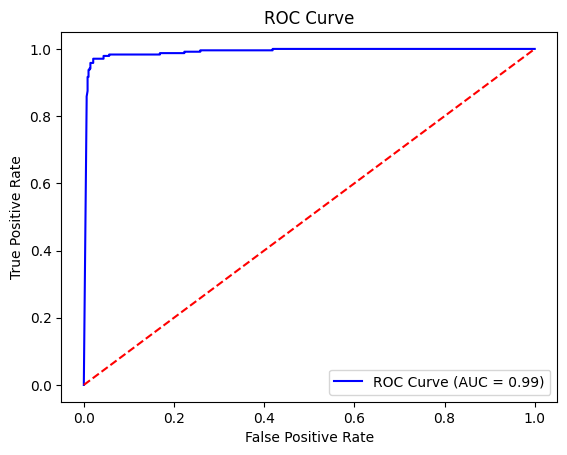


Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        87
           1       0.97      0.95      0.96        73
           2       0.95      0.95      0.95        80

    accuracy                           0.96       240
   macro avg       0.96      0.96      0.96       240
weighted avg       0.96      0.96      0.96       240



In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, roc_auc_score, roc_curve, classification_report
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
# Step 1: Split Data into Training and Test Sets
# Convert PCA features and labels into Torch tensors
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Convert data to torch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Step 2: Define the 14-Layer Neural Network
class NeuralNet14Layer(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(NeuralNet14Layer, self).__init__()
        
        # Define 14 layers
        self.layer1 = nn.Linear(input_dim, 512)
        self.layer2 = nn.ReLU()
        self.layer3 = nn.Linear(512, 512)
        self.layer4 = nn.ReLU()
        self.layer5 = nn.Linear(512, 512)
        self.layer6 = nn.ReLU()
        self.layer7 = nn.Linear(512, 512)
        self.layer8 = nn.ReLU()
        self.layer9 = nn.Linear(512, 512)
        self.layer10 = nn.ReLU()
        self.layer11 = nn.Linear(512, 512)
        self.layer12 = nn.ReLU()
        self.layer13 = nn.Linear(512, 128)
        self.layer14 = nn.ReLU()
        
        self.output_layer = nn.Linear(128, output_dim)  # Output layer for classification

    def forward(self, x):
        # Define forward pass through layers
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        x = self.layer5(x)
        x = self.layer6(x)
        x = self.layer7(x)
        x = self.layer8(x)
        x = self.layer9(x)
        x = self.layer10(x)
        x = self.layer11(x)
        x = self.layer12(x)
        x = self.layer13(x)
        x = self.layer14(x)
        x = self.output_layer(x)  # Final output layer
        return x

# Step 3: Initialize Model, Loss Function, and Optimizer
input_dim = X_train.shape[1]  # Number of PCA components
output_dim = len(np.unique(y))  # Number of unique classes

model = NeuralNet14Layer(input_dim, output_dim)

# Loss function: Cross Entropy Loss (for classification)
criterion = nn.CrossEntropyLoss()

# Optimizer: Adam optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Step 4: Training the Model
num_epochs = 20
batch_size = 64

train_losses = []
val_losses = []

for epoch in range(num_epochs):
    model.train()
    
    # Mini-batch training
    for i in range(0, len(X_train_tensor), batch_size):
        batch_X = X_train_tensor[i:i+batch_size]
        batch_y = y_train_tensor[i:i+batch_size]
        
        # Zero gradients
        optimizer.zero_grad()
        
        # Forward pass
        outputs = model(batch_X)
        
        # Compute loss
        loss = criterion(outputs, batch_y)
        
        # Backward pass and optimization
        loss.backward()
        optimizer.step()
    
    # Track the training loss
    train_losses.append(loss.item())
    
    # Evaluate on validation set
    model.eval()
    with torch.no_grad():
        outputs = model(X_test_tensor)
        val_loss = criterion(outputs, y_test_tensor)
        val_losses.append(val_loss.item())
    
    print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_losses[-1]:.4f}, Val Loss: {val_losses[-1]:.4f}")

# Step 5: Model Evaluation
model.eval()
with torch.no_grad():
    # Predict on test set
    test_outputs = model(X_test_tensor)
    _, predicted = torch.max(test_outputs, 1)  # Get the class with the highest probability
    
    accuracy = accuracy_score(y_test_tensor, predicted)
    print(f"Test Accuracy: {accuracy:.4f}")
    
    # Calculate Precision, Recall, F1-Score
    precision, recall, fscore, _ = precision_recall_fscore_support(y_test_tensor, predicted, average='weighted')
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {fscore:.4f}")
    
    # Calculate AUC (Area Under Curve)
    y_test_bin = label_binarize(y_test_tensor, classes=[0, 1, 2])  # Convert to one-hot encoding
    auc = roc_auc_score(y_test_bin, test_outputs.softmax(dim=1).numpy(), multi_class='ovr')
    print(f"AUC: {auc:.4f}")

    # Generate ROC Curve
    fpr, tpr, _ = roc_curve(y_test_bin.ravel(), test_outputs.softmax(dim=1).detach().numpy().ravel())
    plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc:.2f})')
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.show()

    # Print detailed classification report
    print("\nClassification Report:")
    print(classification_report(y_test_tensor, predicted))

# Step 6: Save the model
torch.save(model.state_dict(), '14_layer_neural_network.pth')